In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Importaciones
import random, os, shutil
import imageio
import cv2
import numpy as np
import PIL

In [5]:
shutil.rmtree('Terravic_Original')

FileNotFoundError: ignored

# **Descomprimimos la base de datos (unzip)**

In [8]:
from zipfile import ZipFile
cont = 0
for i in range(20):
  cont = cont + 1
  if cont < 10 and cont != 5 and cont != 6:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face0{}.zip'.format(cont)
  elif cont >= 10:
    file_name = '/content/drive/My Drive/Terravic_Facial_IR_Database/face{}.zip'.format(cont)
  with ZipFile(file_name, 'r') as zip: 
    zip.extractall('Terravic_Original') 

# **Renombramos las clases de la base de datos**

Esta operación es importante para poder manejar con mayor facilidad los nombres de las carpetas que contienen las imágenes de cada individuo, ya que se debe considerar que las colecciones 5 y 6 están dañadas y no es posible acceder a ellas.

In [ ]:
import os

for i in range(1,21):
  if i >= 7 and i <= 9:
    os.rename('Terravic_Original/face0{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 10 and i <= 11:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face0{}'.format(i - 2))
  elif i >= 12:
    os.rename('Terravic_Original/face{}'.format(i), 'Terravic_Original/face{}'.format(i - 2))

# **Construcción de los conjuntos de entrenamiento, validación y prueba**

**Ordenamos la base de datos aleatoriamente**

In [ ]:
os.mkdir('Terravic_Shuffled')

In [ ]:
#Creación de carpetas
for i in range(18):
  if i < 9: #i = 0
    dest_train = 'Terravic_Shuffled/person0{}/'.format(i+1)
  elif i >= 9:
    dest_train = 'Terravic_Shuffled/person{}/'.format(i+1)
  os.mkdir(dest_train)


for index_class in range(18): #index_class = 0
  sample = 0
  index_class = index_class + 1 #index_class = 1
  if index_class < 10: 
    class_path = 'Terravic_Original/face0{}/'.format(index_class)
  elif index_class >= 10:
    class_path = 'Terravic_Original/face{}/'.format(index_class)

  #Extracción de las imágenes correspondientes a cada individuo
  lst = sorted(os.listdir(class_path))

  #Shuffling the dataset
  random.shuffle(lst)

  for file_name in lst:
    img_person = imageio.imread(class_path + file_name)
    if index_class < 10:
      if sample < 10:                                                       #0000.jpg
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/person0{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

    else:
      if sample < 10:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '000{}.jpg'.format(sample), img_person)
      elif sample >= 10 and sample < 100:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '00{}.jpg'.format(sample), img_person)
      elif sample >= 100 and sample < 1000:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '0{}.jpg'.format(sample), img_person)
      else:
        imageio.imwrite('Terravic_Shuffled/person{}/'.format(index_class) + '{}.jpg'.format(sample), img_person)
      
      sample = sample + 1

**Creación de las carpetas de entrenamiento, validación y prueba, con sus respectivas carpetas para cada individuo**

In [ ]:
datasets = ['train', 'validation', 'test']

for dataset_name in datasets:
  os.mkdir(dataset_name)
  for i in range(18):
    if i < 9:
      dest_train = dataset_name+'/person0{}/'.format(i+1)
    elif i >= 9:
      dest_train = dataset_name+'/person{}/'.format(i+1)
    os.mkdir(dest_train)

**Asignación de imágenes a cada conjunto**

In [ ]:
datasets = ['train', 'validation', 'test']
for dataset_name in datasets:
  for i in range(18):
    if i < 9:
      src_path = 'Terravic_Shuffled/person0{}/'.format(i+1)
      dest_path = dataset_name+'/person0{}/'.format(i+1)
    else:
      src_path = 'Terravic_Shuffled/person{}/'.format(i+1)
      dest_path = dataset_name+'/person{}/'.format(i+1)

    lst = sorted(os.listdir(src_path))

    if dataset_name == 'train':
      cont = 0
      limite = 127
    elif dataset_name == 'validation': #127 + 50 + 50 = 227
      cont = 127
      limite = 177
    else:
      cont = 177
      limite = 227
      
    for file_name in lst:
      if cont < limite:
        img_original = imageio.imread(src_path + file_name)
        if cont < 10:
            imageio.imwrite(dest_path + '000{}.jpg'.format(cont), img_original)
        elif cont >= 10 and cont < 100:
            imageio.imwrite(dest_path + '00{}.jpg'.format(cont), img_original)
        else: 
            imageio.imwrite(dest_path + '0{}.jpg'.format(cont), img_original)
            
        cont = cont + 1

In [ ]:
#Comprobación
import os
for i in range(18):
  i = i +1
  if i < 10:
    print('total  images in train/person0{}:'.format(i), len(os.listdir('train/person0{}/'.format(i))))
  else:
    print('total  images in train/person{}:'.format(i), len(os.listdir('train/person{}/'.format(i))))

total  images in train/person01: 127
total  images in train/person02: 127
total  images in train/person03: 127
total  images in train/person04: 127
total  images in train/person05: 127
total  images in train/person06: 127
total  images in train/person07: 127
total  images in train/person08: 127
total  images in train/person09: 127
total  images in train/person10: 127
total  images in train/person11: 127
total  images in train/person12: 127
total  images in train/person13: 127
total  images in train/person14: 127
total  images in train/person15: 127
total  images in train/person16: 127
total  images in train/person17: 127
total  images in train/person18: 127


# **Sistema de reconocimiento facial**

**Referenciamos los conjuntos de entrenamiento, validación y prueba**

In [ ]:
train_dir = os.path.join('train')
validation_dir = os.path.join('validation')
test_dir = os.path.join('test')

**Carga de la arquitectura VGG16**

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(72, 96, 3)) # input_shape = (largo, ancho, canales)

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
______________________________________________________________

**Congelamos y descongelamos ciertas capas (Fine-tuning)**

In [ ]:
for layer in conv_base.layers:
    if layer.name[:6] == 'block5': 
      layer.trainable = True
    else:
      layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 72, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 72, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 36, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 36, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 36, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 24, 128)       0     

# **Definición de la arquitectura (incluyendo el módulo de transfer learning)**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 3, 512)         14714688  
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 512)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 1, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 18)                9234      
Total params: 14,725,970
Trainable params: 7,089,682
Non-trainable params: 7,636,288
_________________________________________________________________


# **Compilación**

In [ ]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc']) #'acc' -> accuracy -> precisión

# **Definición de los generadores**

In [ ]:
#Using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # Target directory
        target_size=(72, 96), # All images are resized from 240x320 to 72x96
        batch_size= 9, 
        color_mode='rgb',
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

Found 2286 images belonging to 18 classes.
Found 900 images belonging to 18 classes.


# **Entrenamiento**

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 10,
      validation_data=validation_generator,
      validation_steps=900)

Epoch 1/10
254/254 [==============================] - 10s 39ms/step - loss: 0.1574 - acc: 0.9668 - val_loss: 0.0378 - val_acc: 0.9944
Epoch 2/10
254/254 [==============================] - 10s 38ms/step - loss: 0.0029 - acc: 0.9991 - val_loss: 3.6603e-05 - val_acc: 1.0000
Epoch 3/10
254/254 [==============================] - 10s 37ms/step - loss: 6.3457e-04 - acc: 1.0000 - val_loss: 3.8233e-06 - val_acc: 1.0000
Epoch 4/10
254/254 [==============================] - 10s 37ms/step - loss: 1.9694e-04 - acc: 1.0000 - val_loss: 5.7686e-06 - val_acc: 1.0000
Epoch 5/10
254/254 [==============================] - 10s 38ms/step - loss: 4.6663e-05 - acc: 1.0000 - val_loss: 2.3811e-06 - val_acc: 1.0000
Epoch 6/10
254/254 [==============================] - 10s 38ms/step - loss: 5.0044e-06 - acc: 1.0000 - val_loss: 1.5391e-07 - val_acc: 1.0000
Epoch 7/10
254/254 [==============================] - 10s 38ms/step - loss: 2.9315e-05 - acc: 1.0000 - val_loss: 1.3245e-08 - val_acc: 1.0000
Epoch 8/10
254/254

# **Curvas de precisión y pérdida**

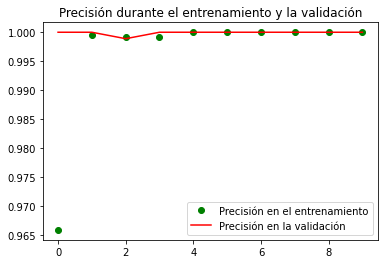

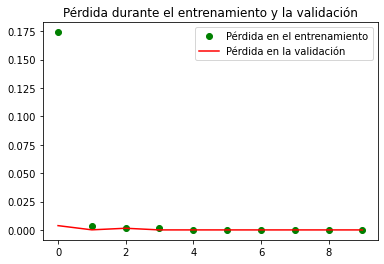

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Precisión en el entrenamiento')
plt.plot(epochs, val_acc, 'r', label='Precisión en la validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.legend()

plt.show()

# **Re-entrenamiento del modelo**

In [ ]:
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

model = models.Sequential()
model.add(conv_base)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(18, activation='softmax'))

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
#Training and validation stages
history = model.fit(
      train_generator,
      steps_per_epoch=254, #70
      epochs= 5)

Epoch 1/5
254/254 [==============================] - 5s 21ms/step - loss: 0.0647 - acc: 0.9873
Epoch 2/5
254/254 [==============================] - 5s 21ms/step - loss: 7.6991e-05 - acc: 1.0000
Epoch 3/5
254/254 [==============================] - 5s 21ms/step - loss: 4.6555e-05 - acc: 1.0000
Epoch 4/5
254/254 [==============================] - 5s 21ms/step - loss: 9.1795e-06 - acc: 1.0000
Epoch 5/5
254/254 [==============================] - 5s 21ms/step - loss: 3.0009e-06 - acc: 1.0000


In [ ]:
#Guardamos el modelo
model.save('/content/drive/My Drive/face_recognition_model1.h5')

In [ ]:
#Cargamos el modelo
from keras.models import load_model

model = load_model('/content/drive/My Drive/face_recognition_model1.h5')

# **Evaluación del modelo final**

In [ ]:
#Test stage
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(72, 96),
        batch_size=1,
        color_mode='rgb',
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=900)
print('Recognition rate: ', test_acc)

Found 900 images belonging to 18 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
Recognition rate:  1.0


# **Predicciones**

In [ ]:
from PIL import Image #PILLOW

width = 96
height = 72
image_face = Image.open('train/person12/0029.jpg')
image_face = image_face.resize((width, height), Image.ANTIALIAS)
image_face = np.array(image_face)
image_face = image_face / 255.0 #-> #Tensor -> (72,96)
image_face = np.expand_dims(image_face, axis = 0) #TENSOR -> (1, 72, 96)
image_face = np.expand_dims(image_face, axis = -1) #TENSOR -> (1, 72, 96, 1)
image_face = np.stack((image_face[:,:,:,0], image_face[:,:,:,0], image_face[:,:,:,0]), axis=3) #TENSOR -> (1, 72, 96, 3)
print(image_face.shape)
prediction = model.predict(image_face)
print('La imagen pertenece a la persona', np.argmax(prediction)+1)

(1, 72, 96, 3)
La imagen pertenece a la persona 12


In [ ]:
prediction

array([[3.2952325e-09, 2.1280044e-09, 6.8502328e-09, 6.9655767e-11,
        9.9999940e-01, 6.1863273e-07, 5.3423055e-10, 1.2896639e-09,
        2.1784936e-09, 1.6985326e-09, 9.4395824e-09, 5.7406585e-10,
        2.0895576e-09, 1.0400025e-09, 7.9663909e-10, 6.9893265e-09,
        1.4328717e-09, 4.8729254e-10]], dtype=float32)